In [1]:
#!pip install pro-football-reference-web-scraper

## Data Collection/EDA

In [3]:
from pro_football_reference_web_scraper import player_game_log as pgl

ja = pgl.get_player_game_log(player='Aaron Rodgers', position='QB', season=2018)
ja

AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
#!pip install nfl_data_py

  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
   ---------------------------------------- 0.0/671.0 kB ? eta -:--:--
   --- ------------------------------------ 61.4/671.0 kB 3.2 MB/s eta 0:00:01
   --- ------------------------------------ 61.4/671.0 kB 3.2 MB/s eta 0:00:01
   --- ------------------------------------ 61.4/671.0 kB 3.2 MB/s eta 0:00:01
   --- ------------------------------------ 61.4/671.0 kB 3.2 MB/s eta 0:00:01
   --- ------------------------------------ 61.4/671.0 kB 3.2 MB/s eta 0:00:01
   ----------- -------------------------- 204.8/671.0 kB 778.2 kB/s eta 0:00:01
   ----------------- -------------------- 307.2/671.0 kB 948.8 kB/s eta 0:00:01
   --------------------- ------------------ 358.4/671.0 kB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 358.4/671.0 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 450.6/671.0 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 532.5/671.0 kB 1.1 

  You can safely remove it manually.
  You can safely remove it manually.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import nfl_data_py as nfl

seasons = nfl.import_seasonal_data(range(2000, 2025), 'REG')

In [6]:
id_name = nfl.import_ids()
id_name.dropna(axis=0, subset=['gsis_id', 'name'], inplace=True)

In [7]:
id_name = id_name[['gsis_id', 'name', 'position']]
seasons = seasons.merge(id_name, how='right', left_on='player_id', right_on='gsis_id')

In [8]:
seasons = seasons[seasons['position'].isin(['QB', 'RB', 'WR', 'TE'])]

In [9]:
seasons.rename({'season':'year'}, axis=1, inplace=True)
seasons.dropna(axis=0, subset='year', inplace=True)
seasons['year'] = seasons['year'].astype(int)
seasons

,player_id,year,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,...,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh,gsis_id,name,position
0,00-0039918,2024,REG,351.0,562.0,3541.0,20.0,6.0,68.0,466.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196150,00-0039918,Caleb Williams,QB
1,00-0039851,2024,REG,225.0,338.0,2276.0,15.0,10.0,34.0,229.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181069,00-0039851,Drake Maye,QB
2,00-0039910,2024,REG,331.0,480.0,3568.0,25.0,9.0,47.0,238.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222196,00-0039910,Jayden Daniels,QB
3,00-0039732,2024,REG,376.0,567.0,3775.0,29.0,12.0,24.0,198.0,...,0.033333,0.005814,0.009901,0.016929,0.007087,0.003509,0.220750,00-0039732,Bo Nix,QB
4,00-0039917,2024,REG,61.0,105.0,775.0,3.0,3.0,4.0,14.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107378,00-0039917,Michael Penix Jr.,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11580,00-0023894,2010,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.500000,0.111111,0.181818,0.253497,0.105594,0.045455,0.093151,00-0023894,Wesley Walls,TE
11581,00-0023894,2013,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.111111,0.200000,0.503597,0.205755,0.047619,0.121451,00-0023894,Wesley Walls,TE
11582,00-0023894,2014,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.076923,0.125000,0.172572,0.076115,0.107143,0.075994,00-0023894,Wesley Walls,TE
11583,00-0023894,2015,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.006024,0.009639,0.076923,0.017721,00-0023894,Wesley Walls,TE


In [10]:
seasons_player = seasons.groupby(['position', 'player_id'])
seasons_player.groups.keys()

dict_keys([('QB', '00-0000865'), ('QB', '00-0007091'), ('QB', '00-0010346'), ('QB', '00-0019596'), ('QB', '00-0019709'), ('QB', '00-0020245'), ('QB', '00-0020531'), ('QB', '00-0020608'), ('QB', '00-0020679'), ('QB', '00-0021206'), ('QB', '00-0021231'), ('QB', '00-0021429'), ('QB', '00-0021678'), ('QB', '00-0022055'), ('QB', '00-0022121'), ('QB', '00-0022177'), ('QB', '00-0022787'), ('QB', '00-0022803'), ('QB', '00-0022924'), ('QB', '00-0022942'), ('QB', '00-0023436'), ('QB', '00-0023459'), ('QB', '00-0023460'), ('QB', '00-0023541'), ('QB', '00-0023578'), ('QB', '00-0023645'), ('QB', '00-0023662'), ('QB', '00-0023682'), ('QB', '00-0024218'), ('QB', '00-0024225'), ('QB', '00-0024226'), ('QB', '00-0024264'), ('QB', '00-0024279'), ('QB', '00-0024296'), ('QB', '00-0024408'), ('QB', '00-0025409'), ('QB', '00-0025423'), ('QB', '00-0025430'), ('QB', '00-0025708'), ('QB', '00-0025970'), ('QB', '00-0026143'), ('QB', '00-0026158'), ('QB', '00-0026197'), ('QB', '00-0026300'), ('QB', '00-0026349'),

In [11]:
seas_play_agg = seasons_player.agg({'fantasy_points_ppr':np.mean, 'name':np.size})

C:\Users\svang\AppData\Local\Temp\ipykernel_15252\2746683429.py:1: FutureWarning: The provided callable <function mean at 0x000001F55342F7E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  seas_play_agg = seasons_player.agg({'fantasy_points_ppr':np.mean, 'name':np.size})


In [12]:
seas_play_agg = seas_play_agg[seas_play_agg['name'] > 5]

In [13]:
best_players = seas_play_agg.groupby('position', group_keys=False)\
               .apply(lambda x: x.sort_values('fantasy_points_ppr', ascending=False)\
                    .head(10))


In [14]:
qb_ids = best_players.loc['QB'].index
rb_ids = best_players.loc['RB'].index
wr_ids = best_players.loc['WR'].index
te_ids = best_players.loc['TE'].index

In [15]:
te_ids

Index(['00-0030506', '00-0006101', '00-0033288', '00-0027656', '00-0034753',
       '00-0021547', '00-0022127', '00-0027696', '00-0030061', '00-0035229'],
      dtype='object', name='player_id')

In [16]:
seasons[seasons['player_id'] == '00-0021547']

,player_id,year,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,...,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh,gsis_id,name,position
11081,00-0021547,2003,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.200000,0.187500,0.150612,0.170391,1.271242,0.087899,00-0021547,Antonio Gates,TE
11082,00-0021547,2004,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.481481,0.371622,0.388571,0.387961,0.331849,2.300716,0.193623,00-0021547,Antonio Gates,TE
11083,00-0021547,2005,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.400000,0.342541,0.349515,0.355993,0.329589,2.242363,0.192990,00-0021547,Antonio Gates,TE
11084,00-0021547,2006,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.375000,0.289941,0.300518,0.322944,0.291711,1.982833,0.151104,00-0021547,Antonio Gates,TE
11085,00-0021547,2007,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.409091,0.341772,0.350000,0.359506,0.329755,2.089172,0.183476,00-0021547,Antonio Gates,TE
11086,00-0021547,2008,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.258065,0.215470,0.221698,0.221908,0.200214,1.543860,0.130725,00-0021547,Antonio Gates,TE
11087,00-0021547,2009,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.275862,0.274775,0.274900,0.266315,0.260587,2.229287,0.162980,00-0021547,Antonio Gates,TE
11088,00-0021547,2010,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.625000,0.274510,0.307692,0.437740,0.325384,2.119241,0.194345,00-0021547,Antonio Gates,TE
11089,00-0021547,2011,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.280000,0.233161,0.238532,0.242341,0.219746,1.607438,0.145683,00-0021547,Antonio Gates,TE
11090,00-0021547,2012,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.304348,0.178571,0.193717,0.233149,0.190430,1.084677,0.129705,00-0021547,Antonio Gates,TE


In [17]:
best_qbs = seasons[seasons['player_id'].isin(qb_ids)].groupby('player_id')
best_rbs = seasons[seasons['player_id'].isin(rb_ids)].groupby('player_id')
best_wrs = seasons[seasons['player_id'].isin(wr_ids)].groupby('player_id')
best_tes = seasons[seasons['player_id'].isin(te_ids)].groupby('player_id')

## Time Series/Panel Analysis

In [18]:
cmap = plt.get_cmap()
color_names = cmap(np.linspace(0,1,10))

In [19]:
import matplotlib.colors as mcolors

def plot_position_group(position_data):
    i = 0
    for name, group in position_data:
        plt.plot(group['year'], group['fantasy_points_ppr'], c=color_names[i], label=group['name'].mode()[0])
        i += 1
    plt.legend(loc="lower left")
    plt.show()

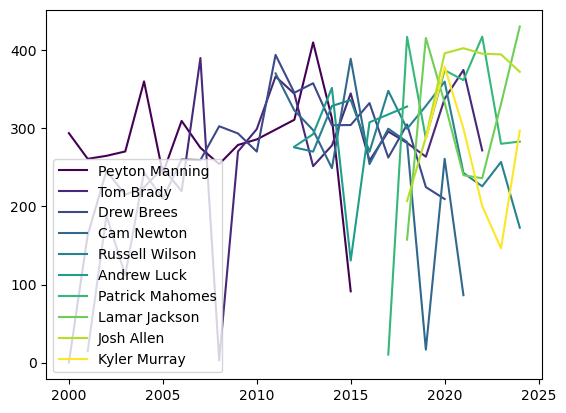

In [20]:
plot_position_group(best_qbs)

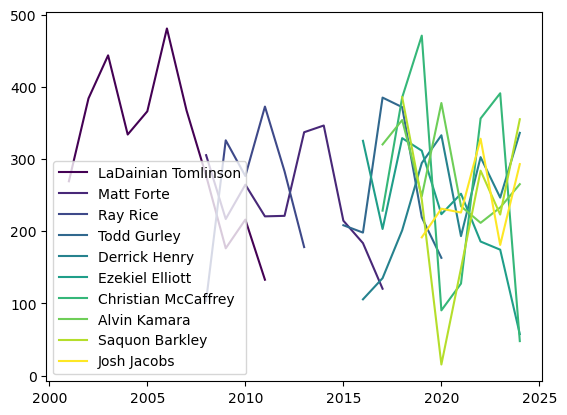

In [21]:
plot_position_group(best_rbs)

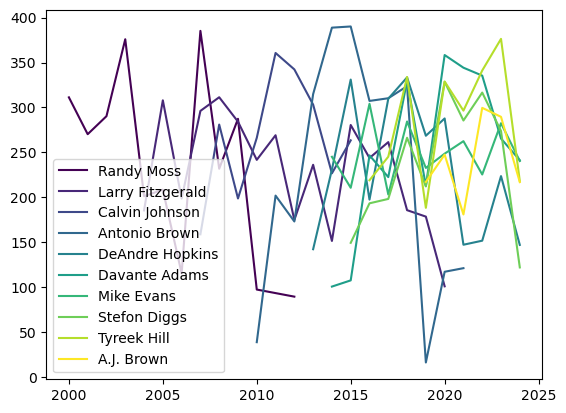

In [22]:
plot_position_group(best_wrs)

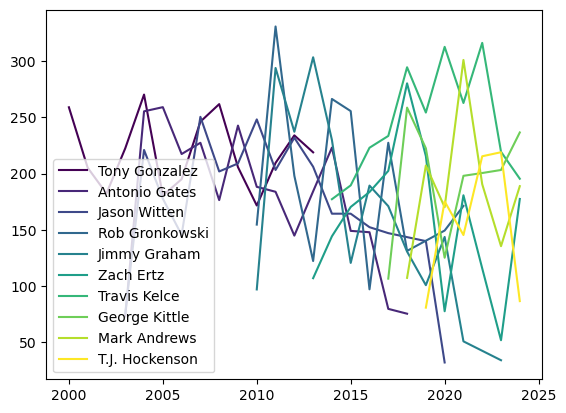

In [23]:
plot_position_group(best_tes)

In [24]:
best_qbs.obj['year']

2278     2019
2279     2020
2280     2021
2281     2022
2282     2023
         ... 
11477    2010
11478    2012
11479    2013
11480    2014
11481    2015
Name: year, Length: 116, dtype: int32

In [25]:
# Create a pivot table for each position to get panel data
qb_panel = pd.pivot_table(best_qbs.obj, index='year', columns='name', values='fantasy_points_ppr', aggfunc='sum', fill_value=0)
qb_panel

name,Andrew Luck,Cam Newton,Drew Brees,Josh Allen,Kyler Murray,Lamar Jackson,Patrick Mahomes,Peyton Manning,Russell Wilson,Tom Brady
year,,,,,,,,,,
2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,293.82,0.00,0.24
2001,0.00,0.00,14.64,0.00,0.00,0.00,0.00,260.94,0.00,163.32
2002,0.00,0.00,188.36,0.00,0.00,0.00,0.00,264.80,0.00,245.56
2003,0.00,0.00,111.82,0.00,0.00,0.00,0.00,270.38,0.00,215.10
2004,0.00,0.00,243.66,0.00,0.00,0.00,0.00,360.08,0.00,224.40
2005,0.00,0.00,209.94,0.00,0.00,0.00,0.00,242.38,0.00,249.30
2006,0.00,0.00,260.16,0.00,0.00,0.00,0.00,309.48,0.00,219.52
2007,0.00,0.00,259.32,0.00,0.00,0.00,0.00,275.10,0.00,390.04
2008,0.00,0.00,302.66,0.00,0.00,0.00,0.00,254.18,0.00,3.04


In [26]:
qb_panel.apply(lambda x: x.fillna(x.mean()))

name,Andrew Luck,Cam Newton,Drew Brees,Josh Allen,Kyler Murray,Lamar Jackson,Patrick Mahomes,Peyton Manning,Russell Wilson,Tom Brady
year,,,,,,,,,,
2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,293.82,0.00,0.24
2001,0.00,0.00,14.64,0.00,0.00,0.00,0.00,260.94,0.00,163.32
2002,0.00,0.00,188.36,0.00,0.00,0.00,0.00,264.80,0.00,245.56
2003,0.00,0.00,111.82,0.00,0.00,0.00,0.00,270.38,0.00,215.10
2004,0.00,0.00,243.66,0.00,0.00,0.00,0.00,360.08,0.00,224.40
2005,0.00,0.00,209.94,0.00,0.00,0.00,0.00,242.38,0.00,249.30
2006,0.00,0.00,260.16,0.00,0.00,0.00,0.00,309.48,0.00,219.52
2007,0.00,0.00,259.32,0.00,0.00,0.00,0.00,275.10,0.00,390.04
2008,0.00,0.00,302.66,0.00,0.00,0.00,0.00,254.18,0.00,3.04


In [27]:
from statsmodels.formula.api import ols

In [28]:
ts_data = seasons.set_index('year').sort_index()
qb_ts_data = ts_data[ts_data['position'] == 'QB']
rb_ts_data = ts_data[ts_data['position'] == 'RB']
wr_ts_data = ts_data[ts_data['position'] == 'WR']
te_ts_data = ts_data[ts_data['position'] == 'TE']

In [29]:
wr_ts_data

,player_id,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,...,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh,gsis_id,name,position
year,,,,,,,,,,,,,,,,,,,,,
2000,00-0011754,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.454545,0.291667,0.315556,0.405505,0.376081,2.914286,0.214936,00-0011754,Randy Moss,WR
2000,00-0004541,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.047619,0.086957,0.082927,0.067631,0.079638,0.573975,0.050527,00-0004541,Donald Driver,WR
2000,00-0015754,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.181818,0.175439,0.176471,0.165222,0.155265,1.108434,0.082124,00-0015754,Brandon Stokley,WR
2000,00-0019642,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.160494,0.151163,0.075960,0.121536,0.906977,0.074350,00-0019642,Plaxico Burress,WR
2001,00-0020494,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.040000,0.036364,0.020202,0.032323,0.239521,0.015972,00-0020494,Santana Moss,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,00-0036913,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001508,00-0036913,Kadarius Toney,WR
2024,00-0036980,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052632,0.138889,0.130653,0.095664,0.121483,0.813918,0.093082,00-0036980,Elijah Moore,WR
2024,00-0036963,REG,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.307692,0.293388,0.295374,0.287695,0.275697,2.292196,0.171434,00-0036963,Amon-Ra St. Brown,WR


In [30]:
#!pip install pmdarima

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.preprocessing import LabelEncoder

In [32]:
# From https://stackoverflow.com/questions/45033980/how-to-compute-aic-for-linear-regression-model-in-python
def llf_(y, pr):
    # return maximized log likelihood
    n = float(len(y))
    n2 = n / 2.0
    resid = y - pr
    ssr = np.sum((resid)**2)
    llf = -n2*np.log(2*np.pi) - n2*np.log(ssr / n) - n2
    return llf

def aic(y, pr, p):
    # return aic metric
    llf = llf_(y, pr)
    return -2*llf+2*p

In [33]:
def build_arima(ts_data):
    ts_data['name_enc'] = LabelEncoder().fit_transform(ts_data['name'])
    train = ts_data[:round(len(ts_data)*0.8)]
    test = ts_data[round(len(ts_data)*0.8):]
    arima_model = auto_arima(y=train['fantasy_points_ppr'], X=train[['name_enc']],
                             start_p=0, d=1, start_q=0,
                             max_p=5, max_d=5, max_q=5,
                             start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                             stationary=False,
                             error_action='warn', trace=True,
                             suppress_warnings=True, stepwise=True,
                             random_state=20, n_fits=50)
            
    arima_model
    preds = arima_model.predict(X=test[['name_enc']], n_periods=len(test))
    preds.index = test.index
    test.loc[:,'fantasy_points_ppr_pred'] = preds

    return arima_model, train, test

In [34]:
wr_model, wr_train, wr_test = build_arima(wr_ts_data)

C:\Users\svang\AppData\Local\Temp\ipykernel_15252\2515174093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data['name_enc'] = LabelEncoder().fit_transform(ts_data['name'])


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30515.772, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29809.665, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30513.774, Time=0.51 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29485.826, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=29343.178, Time=0.31 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=29248.648, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=29165.104, Time=0.53 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=29163.107, Time=0.42 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=29246.648, Time=0.28 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=2.00 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=1.66 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0]          
To

c:\Users\svang\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\svang\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\svang\AppData\Local\Temp\ipykernel_15252\2515174093.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'fantasy_points_ppr_pred'] = preds


In [35]:
wr_test[['name','fantasy_points_ppr','fantasy_points_ppr_pred']]

,name,fantasy_points_ppr,fantasy_points_ppr_pred
year,,,
2022,Andre Baccellia,11.50,71.628923
2022,Cody White,1.20,87.877472
2022,Tanner Gentry,0.00,75.838810
2022,Stefon Diggs,316.60,59.854233
2022,Trent Taylor,13.70,61.867195
...,...,...,...
2024,Kadarius Toney,-0.40,65.402089
2024,Elijah Moore,120.90,64.824105
2024,Amon-Ra St. Brown,316.18,63.999466


In [36]:
wr_ts_data['name'].value_counts()

name
Steve Smith          22
Larry Fitzgerald     17
DeSean Jackson       15
Anquan Boldin        14
Andre Johnson        14
                     ..
John Ursua            1
Josh Boyce            1
Alexander Hollins     1
Andre Baccellia       1
Tay Martin            1
Name: count, Length: 707, dtype: int64

In [37]:
wr_ts_data[wr_ts_data['name'] == "Davante Adams"]

,player_id,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,...,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh,gsis_id,name,position,name_enc
year,,,,,,,,,,,,,,,,,,,,,
2014,00-0031381,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117949,0.113043,0.098247,0.105767,0.929167,0.069277,00-0031381,Davante Adams,WR,173
2015,00-0031381,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.137931,0.122807,0.098941,0.135229,1.026971,0.092720,00-0031381,Davante Adams,WR,173
2016,00-0031381,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.202703,0.217557,0.262148,0.239438,1.608065,0.150850,00-0031381,Davante Adams,WR,173
2017,00-0031381,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.281250,0.298913,0.346227,0.303963,1.806122,0.185872,00-0031381,Davante Adams,WR,173
2018,00-0031381,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.315271,0.337719,0.414999,0.351998,2.310000,0.220758,00-0031381,Davante Adams,WR,173
2019,00-0031381,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.391304,0.383117,0.336735,0.351276,2.286697,0.211983,00-0031381,Davante Adams,WR,173
2020,00-0031381,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.394595,0.402655,0.405742,0.385772,2.980477,0.235842,00-0031381,Davante Adams,WR,173
2021,00-0031381,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.373333,0.362595,0.327483,0.345595,2.793165,0.217254,00-0031381,Davante Adams,WR,173
2022,00-0031381,REG,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,...,0.336788,0.357466,0.431253,0.390005,2.587031,0.229452,00-0031381,Davante Adams,WR,173


In [38]:
wr_train.loc[wr_train['name'] == "Davante Adams", "fantasy_points_ppr"]

year
2014    100.6
2015    107.5
2016    246.7
2017    222.5
2018    329.6
2019    212.7
2020    358.4
2021    344.3
Name: fantasy_points_ppr, dtype: float64

<Axes: xlabel='year'>

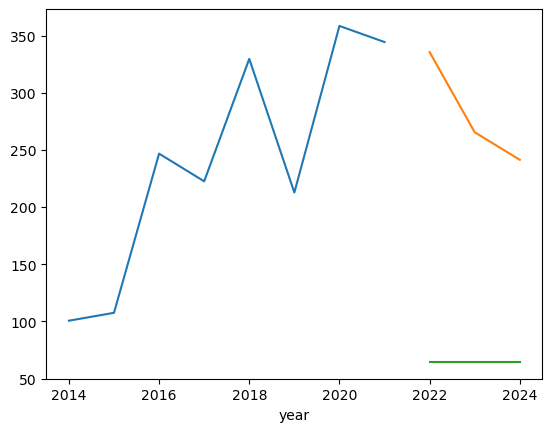

In [39]:
wr_train.loc[wr_train['name'] == "Davante Adams", "fantasy_points_ppr"].plot()
wr_test.loc[wr_test['name'] == "Davante Adams", "fantasy_points_ppr"].plot()
wr_test.loc[wr_test['name'] == "Davante Adams", "fantasy_points_ppr_pred"].plot()

In [40]:
wr_panel_data = wr_ts_data.reset_index().set_index(['name', 'year'])
wr_panel_data

,,player_id,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,...,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh,gsis_id,position,name_enc
name,year,,,,,,,,,,,,,,,,,,,,,
Randy Moss,2000,00-0011754,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.454545,0.291667,0.315556,0.405505,0.376081,2.914286,0.214936,00-0011754,WR,559
Donald Driver,2000,00-0004541,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.047619,0.086957,0.082927,0.067631,0.079638,0.573975,0.050527,00-0004541,WR,227
Brandon Stokley,2000,00-0015754,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.181818,0.175439,0.176471,0.165222,0.155265,1.108434,0.082124,00-0015754,WR,71
Plaxico Burress,2000,00-0019642,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.160494,0.151163,0.075960,0.121536,0.906977,0.074350,00-0019642,WR,544
Santana Moss,2001,00-0020494,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.040000,0.036364,0.020202,0.032323,0.239521,0.015972,00-0020494,WR,603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kadarius Toney,2024,00-0036913,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001508,00-0036913,WR,405
Elijah Moore,2024,00-0036980,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052632,0.138889,0.130653,0.095664,0.121483,0.813918,0.093082,00-0036980,WR,248
Amon-Ra St. Brown,2024,00-0036963,REG,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.307692,0.293388,0.295374,0.287695,0.275697,2.292196,0.171434,00-0036963,WR,24


In [43]:
#!pip install linearmodels

  Using cached setuptools_scm-8.2.0-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.7 MB 2.1 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.7 MB 4.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.7 MB 5.4 MB/s eta 0:00:01
   ------------------------------- -------- 1.3/1.7 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/115.7 kB ? eta -:--:--
   -------------------------------------- - 112.6/115.7 kB ? eta -:--:--
   ---------------------------------------- 115.7/115.7 kB 3.4 MB/s eta 0:00:00
Using cached setuptools_scm-8.2.0-py3-none-any.whl (43 kB)


In [44]:
from linearmodels.panel.model import PanelOLS, RandomEffects
import statsmodels.api as sm

In [45]:
wr_panel_data

,,player_id,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,...,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh,gsis_id,position,name_enc
name,year,,,,,,,,,,,,,,,,,,,,,
Randy Moss,2000,00-0011754,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.454545,0.291667,0.315556,0.405505,0.376081,2.914286,0.214936,00-0011754,WR,559
Donald Driver,2000,00-0004541,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.047619,0.086957,0.082927,0.067631,0.079638,0.573975,0.050527,00-0004541,WR,227
Brandon Stokley,2000,00-0015754,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.181818,0.175439,0.176471,0.165222,0.155265,1.108434,0.082124,00-0015754,WR,71
Plaxico Burress,2000,00-0019642,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.160494,0.151163,0.075960,0.121536,0.906977,0.074350,00-0019642,WR,544
Santana Moss,2001,00-0020494,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.040000,0.036364,0.020202,0.032323,0.239521,0.015972,00-0020494,WR,603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kadarius Toney,2024,00-0036913,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001508,00-0036913,WR,405
Elijah Moore,2024,00-0036980,REG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052632,0.138889,0.130653,0.095664,0.121483,0.813918,0.093082,00-0036980,WR,248
Amon-Ra St. Brown,2024,00-0036963,REG,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.307692,0.293388,0.295374,0.287695,0.275697,2.292196,0.171434,00-0036963,WR,24


In [46]:
wr_panel_data['y'] = wr_panel_data['fantasy_points_ppr']
X = sm.add_constant(pd.DataFrame({'time': wr_panel_data.index.get_level_values('year')}))

wr_model_pooled = PanelOLS.from_formula("y ~ 1 + EntityEffects + TimeEffects", wr_panel_data)
wr_results_pooled = wr_model_pooled.fit()

In [47]:
wr_results_pooled

Dep. Variable:,y,R-squared:,0.0000
Estimator:,PanelOLS,R-squared (Between):,0.0000
No. Observations:,3085,R-squared (Within):,0.0000
Date:,"Sat, Apr 12 2025",R-squared (Overall):,0.0000
Time:,16:47:24,Log-likelihood,-1.649e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,--
Entities:,707,P-value,--
Avg Obs:,4.3635,Distribution:,--
Min Obs:,1.0000,,
Max Obs:,22.000,F-statistic (robust):,--


In [48]:
wr_panel_data['intercept'] = 1
wr_panel_data['y_lag1'] = wr_panel_data['y'].diff(1)

In [49]:
wr_model_random = RandomEffects.from_formula("y ~ 1 + y_lag1 + EntityEffects + TimeEffects", wr_panel_data)
wr_results_random = wr_model_random.fit()

c:\Users\svang\AppData\Local\anaconda3\Lib\site-packages\linearmodels\panel\model.py:2759: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [50]:
wr_results_random

Dep. Variable:,y,R-squared:,0.3192
Estimator:,RandomEffects,R-squared (Between):,0.4510
No. Observations:,3084,R-squared (Within):,0.3158
Date:,"Sat, Apr 12 2025",R-squared (Overall):,0.4239
Time:,16:47:24,Log-likelihood,-1.647e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1445.3
Entities:,707,P-value,0.0000
Avg Obs:,4.3621,Distribution:,"F(1,3082)"
Min Obs:,1.0000,,
Max Obs:,22.000,F-statistic (robust):,1851.1


In [51]:
wr_results_random.predict(exog=wr_panel_data[['intercept', 'y_lag1']])

,,predictions
name,year,
Donald Driver,2000,-14.147266
Brandon Stokley,2000,76.012224
Plaxico Burress,2000,85.768727
Santana Moss,2001,67.274473
Randy Moss,2001,187.471453
...,...,...
Kadarius Toney,2024,1.016456
Elijah Moore,2024,131.220708
Amon-Ra St. Brown,2024,160.208101


In [52]:
test_data = pd.DataFrame(index=pd.MultiIndex.from_tuples([('Davante Adams', 2025),
                                ('Tyreek Hill', 2025),
                                ('Deandre Hopkins', 2025),
                                ('Cooper Kupp', 2025)], names=['name', 'year']))
test_data['intercept'] = 1
test_data['y_lag1'] = wr_panel_data.loc[[('Davante Adams', 2024),
                                ('Tyreek Hill', 2024),
                                ('DeAndre Hopkins', 2024),
                                ('Cooper Kupp', 2024)], 'y'].values

In [53]:
test_data

,,intercept,y_lag1
name,year,,
Davante Adams,2025,1,241.3
Tyreek Hill,2025,1,218.2
Deandre Hopkins,2025,1,147.0
Cooper Kupp,2025,1,175.0


In [54]:
wr_results_random.predict(test_data)

,,predictions
name,year,
Davante Adams,2025,178.239999
Tyreek Hill,2025,169.188785
Deandre Hopkins,2025,141.290673
Cooper Kupp,2025,152.261841


## Clustering

In [56]:
qb_ts_data.reset_index(drop=True).columns

Index(['player_id', 'season_type', 'completions', 'attempts', 'passing_yards',
       'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions',
       'racr', 'target_share', 'air_yards_share', 'wopr_x',
       'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr', 'games',
       'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh', 'rfd_sh',
       'rtdfd_sh', 'dom', 'w8dom', 'y

In [57]:
qb_data = qb_ts_data.reset_index(drop=True)
qb_data = pd.concat([qb_data.iloc[:,0:17], qb_data['name']], axis=1)
qb_data = qb_data[qb_data.season_type == 'REG'].drop(columns=['player_id','season_type'])
qb_data

,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr,name
0,353.0,564.0,4388.0,33.0,14.0,20.0,131.0,4.0,1.0,0.0,0.0,211.0,140.927869,1.0,0.000000,Peyton Manning
1,10.0,19.0,104.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,4.0,-0.740078,0.0,0.000000,Matt Hasselbeck
2,219.0,407.0,2469.0,13.0,14.0,38.0,226.0,5.0,3.0,0.0,0.0,116.0,-68.767247,0.0,0.000000,Charlie Batch
3,2.0,3.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.072561,0.0,0.000000,Chris Redman
4,1.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.342476,0.0,0.000000,Tom Brady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,27.0,50.0,276.0,1.0,1.0,2.0,11.0,0.0,0.0,313.0,151.0,11.0,-14.487911,0.0,2.701650,Tim Boyle
1281,407.0,570.0,4500.0,41.0,16.0,40.0,248.0,4.0,1.0,3971.0,2439.0,224.0,116.229628,1.0,20.530268,Baker Mayfield
1282,1.0,1.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,1.0,1.432553,0.0,1.461538,Kyle Allen
1283,361.0,545.0,4319.0,35.0,12.0,48.0,335.0,5.0,2.0,4606.0,1753.0,207.0,50.574751,0.0,16.664399,Sam Darnold


In [58]:
qb_data_agg = qb_data.groupby('name').mean().reset_index()

In [59]:
from sklearn.cluster import KMeans

In [60]:
qb_km = KMeans(5)
qb_km.fit(qb_data_agg.drop(columns='name'))

c:\Users\svang\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [61]:
qb_km.cluster_centers_

array([[ 1.88093574e+01,  3.26491085e+01,  1.97307096e+02,
         8.58145583e-01,  1.27178149e+00,  3.10369646e+00,
         2.01586515e+01,  5.29918711e-01,  2.74766254e-01,
         2.47398025e+02,  8.85033494e+01,  9.32229833e+00,
        -8.95695790e+00,  1.55460217e-02,  1.80047309e+00],
       [ 2.45433698e+02,  3.86680058e+02,  2.76697378e+03,
         1.73580571e+01,  9.59619150e+00,  2.78488369e+01,
         1.83075266e+02,  4.08041674e+00,  1.93020853e+00,
         3.14231836e+03,  1.24911378e+03,  1.33391064e+02,
         1.49470992e+01,  7.88668920e-01,  1.14120210e+01],
       [ 7.31114952e+01,  1.23559028e+02,  7.88843843e+02,
         3.83994182e+00,  3.85484887e+00,  1.00798984e+01,
         6.76309230e+01,  1.68938407e+00,  8.10425947e-01,
         9.32074297e+02,  3.39581110e+02,  3.78364003e+01,
        -1.59127241e+01,  1.41905605e-01,  4.28707583e+00],
       [ 1.43669844e+02,  2.37571643e+02,  1.61144218e+03,
         8.43754122e+00,  6.48518320e+00,  1.92176441

In [62]:
qb_data_agg.columns[1:]

Index(['completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions',
       'pacr'],
      dtype='object')

In [63]:
pd.DataFrame(qb_km.cluster_centers_, columns=qb_data_agg.columns[1:])

,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr
0,18.809357,32.649109,197.307096,0.858146,1.271781,3.103696,20.158652,0.529919,0.274766,247.398025,88.503349,9.322298,-8.956958,0.015546,1.800473
1,245.433698,386.680058,2766.973779,17.358057,9.596191,27.848837,183.075266,4.080417,1.930209,3142.318356,1249.113783,133.391064,14.947099,0.788669,11.412021
2,73.111495,123.559028,788.843843,3.839942,3.854849,10.079898,67.630923,1.689384,0.810426,932.074297,339.581110,37.836400,-15.912724,0.141906,4.287076
3,143.669844,237.571643,1611.442175,8.437541,6.485183,19.217644,125.711200,2.753635,1.393964,1892.752611,719.910432,76.407885,-13.898252,0.395733,7.288388
4,335.768640,517.382800,3792.748412,25.542960,10.860871,32.085355,213.537081,4.501278,2.065880,3977.477198,1699.885041,183.922972,57.104452,1.092985,14.118274


In [64]:
qb_data_agg['name']

0          A.J. McCarron
1          Aaron Rodgers
2        Aidan O'Connell
3             Alex Smith
4            Alex Tanney
             ...        
209          Vince Young
210           Will Grier
211           Will Levis
212    Zach Mettenberger
213          Zach Wilson
Name: name, Length: 214, dtype: object

In [65]:
group_names = dict()

for i in range(5):
    group_names[i] = list(qb_data_agg.loc[qb_km.labels_ == i,'name'].values)

In [68]:
group_names[0]

['A.J. McCarron',
 'Alex Tanney',
 'Anthony Brown',
 'Ben DiNucci',
 'Brandon Allen',
 'Brett Rypien',
 'Bryce Perkins',
 'Caleb Hanie',
 'Cardale Jones',
 'Chad Kelly',
 'Charlie Batch',
 'Charlie Whitehurst',
 'Chase Daniel',
 'Chris Oladokun',
 'Chris Redman',
 'Chris Streveler',
 'Clayton Tune',
 'Connor Cook',
 'David Blough',
 'David Fales',
 'Davis Webb',
 'Garrett Gilbert',
 'Graham Harrell',
 'Hendon Hooker',
 'Ian Book',
 'Jacob Eason',
 'Jake Fromm',
 'Jake Haener',
 'Jake Rudock',
 'Jaren Hall',
 'Jarrett Stidham',
 'Jeff Tuel',
 'Joe Callahan',
 'Joe Milton',
 'Joe Webb',
 'John Wolford',
 'Josh Johnson',
 'Kellen Clemens',
 'Kellen Mond',
 'Kevin Hogan',
 'Kurt Benkert',
 'Kyle Lauletta',
 'Kyle Trask',
 'Landry Jones',
 'Logan Woodside',
 'Luke Falk',
 'Malik Willis',
 'Matt Barkley',
 'Matt Flynn',
 'Matt McGloin',
 'Matt Simms',
 'Mike Kafka',
 'Nate Sudfeld',
 'Nathan Peterman',
 'Paxton Lynch',
 'Ryan Finley',
 'Ryan Griffin',
 'Ryan Mallett',
 'Sam Ehlinger',
 'Sean

In [71]:
qb_km.feature_names_in_

array(['completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr'], dtype=object)

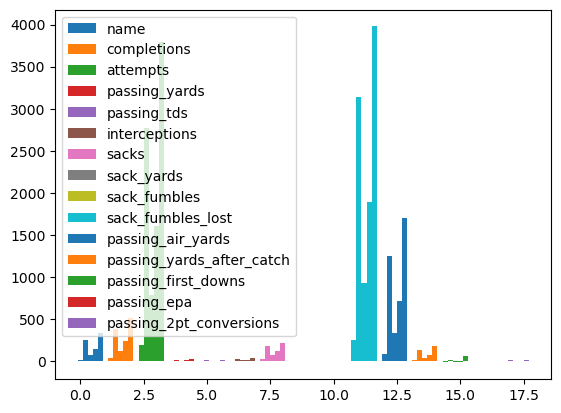

In [67]:
width = 0.2
x = np.arange(0,1,width)

for i in range(qb_km.cluster_centers_.shape[1]):
    plt.bar(x + i*6*width, qb_km.cluster_centers_[:,i], width, label=qb_data_agg.columns[i])
plt.legend()

In [83]:
from sklearn.preprocessing import Normalizer
norm = Normalizer('l1')
qb_clusters_norm = norm.fit_transform(qb_km.cluster_centers_.T).T

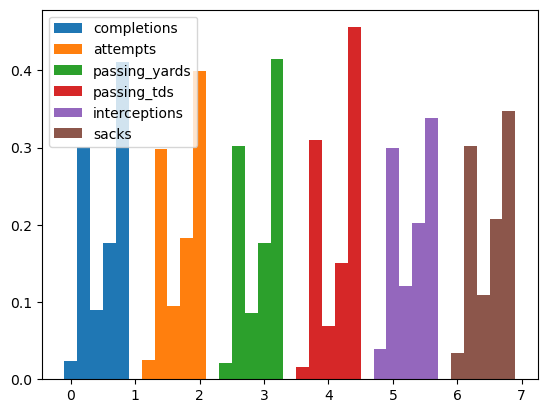

In [84]:
width = 0.2
x = np.arange(0,1,width)

for i in range(6):
    plt.bar(x + i*6*width, qb_clusters_norm[:,i], width, label=qb_data_agg.columns[i+1])
plt.legend()

In [86]:
qb_data_agg

,name,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr
0,A.J. McCarron,18.833333,29.833333,198.666667,1.000000,0.500000,3.500000,23.833333,0.000000,0.000000,234.500000,87.833333,9.833333,-1.743841,0.000000,1.624577
1,Aaron Rodgers,268.400000,412.200000,3147.250000,25.150000,5.800000,28.500000,194.800000,3.450000,1.600000,3425.950000,1516.350000,149.450000,73.683616,1.000000,11.786077
2,Aidan O'Connell,183.500000,293.000000,1915.000000,10.000000,5.500000,17.000000,127.500000,1.500000,1.000000,2241.000000,897.000000,92.500000,-6.274972,0.000000,8.607626
3,Alex Smith,232.285714,371.000000,2547.214286,14.214286,7.714286,31.000000,176.428571,3.928571,1.714286,2555.071429,1252.357143,120.714286,3.140501,0.428571,12.866334
4,Alex Tanney,5.500000,7.500000,50.000000,0.500000,0.000000,1.500000,17.000000,0.000000,0.000000,62.000000,12.000000,3.500000,-0.304199,0.000000,0.902439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Vince Young,125.833333,217.166667,1494.000000,7.666667,8.500000,14.000000,75.000000,3.166667,1.000000,2114.666667,600.000000,74.166667,-3.420424,0.000000,6.830611
210,Will Grier,28.000000,52.000000,228.000000,0.000000,4.000000,6.000000,44.000000,0.000000,0.000000,491.000000,179.000000,12.000000,-28.179331,0.000000,0.602158
211,Will Levis,169.500000,278.000000,1949.500000,10.500000,8.000000,34.500000,209.000000,5.000000,2.500000,2654.500000,837.500000,83.500000,-39.755711,1.000000,8.539873
212,Zach Mettenberger,104.000000,172.500000,1173.500000,6.000000,7.000000,15.500000,118.000000,3.000000,2.000000,1407.500000,539.000000,50.500000,-45.776410,0.000000,5.928003


In [85]:
import seaborn as sns

<Axes: >

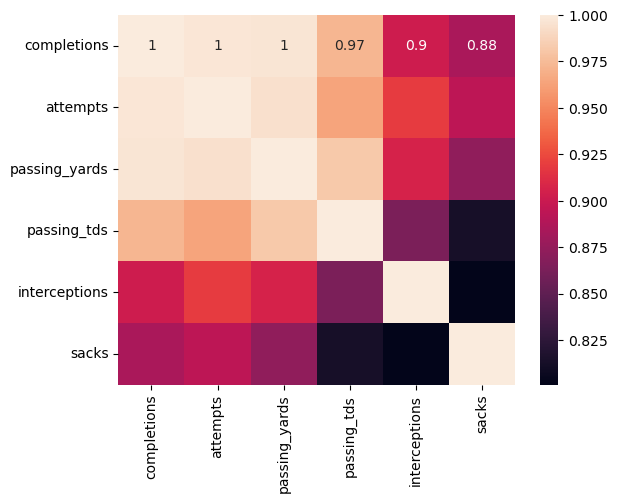

In [ ]:
sns.heatmap(qb_data_agg.iloc[:,1:7].corr())

In [ ]:
qb_data_agg.iloc[:,1:7].corr().iloc[3]

C:\Users\svang\AppData\Local\Temp\ipykernel_15252\2196308238.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qb_data_agg.iloc[:,1:7].corr().iloc[3][2]


0.9815352690948569

In [92]:
qb_data_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       214 non-null    object 
 1   completions                214 non-null    float64
 2   attempts                   214 non-null    float64
 3   passing_yards              214 non-null    float64
 4   passing_tds                214 non-null    float64
 5   interceptions              214 non-null    float64
 6   sacks                      214 non-null    float64
 7   sack_yards                 214 non-null    float64
 8   sack_fumbles               214 non-null    float64
 9   sack_fumbles_lost          214 non-null    float64
 10  passing_air_yards          214 non-null    float64
 11  passing_yards_after_catch  214 non-null    float64
 12  passing_first_downs        214 non-null    float64
 13  passing_epa                214 non-null    float64

In [110]:
qb_data_agg.iloc[:,1:].corr().apply(lambda x: (x.min(), x.index[np.argmin(x)]))

,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr
0,0.571882,0.532791,0.60823,0.627079,0.383098,0.251835,0.225823,0.239605,0.113738,0.498004,0.564599,0.62055,0.113738,0.353368,0.530804
1,passing_epa,passing_epa,passing_epa,sack_fumbles_lost,passing_epa,passing_epa,passing_epa,passing_epa,passing_epa,passing_epa,passing_epa,passing_epa,sack_fumbles_lost,passing_epa,passing_epa


In [122]:
qb_data_agg.iloc[:,1:].corr().loc[:,'completions']

completions                  1.000000
attempts                     0.997375
passing_yards                0.996243
passing_tds                  0.972754
interceptions                0.901817
sacks                        0.884812
sack_yards                   0.877908
sack_fumbles                 0.826855
sack_fumbles_lost            0.704855
passing_air_yards            0.975467
passing_yards_after_catch    0.980964
passing_first_downs          0.995026
passing_epa                  0.571882
passing_2pt_conversions      0.736110
pacr                         0.950677
Name: completions, dtype: float64

In [126]:
uncorr_cols = ['completions', 'passing_epa', 'sack_fumbles_lost']

In [127]:
qb_km2 = KMeans(5)
qb_km2.fit(qb_data_agg[uncorr_cols])

c:\Users\svang\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [128]:
norm2 = Normalizer('l1')
qb_clusters_norm2 = norm2.fit_transform(qb_km2.cluster_centers_.T).T

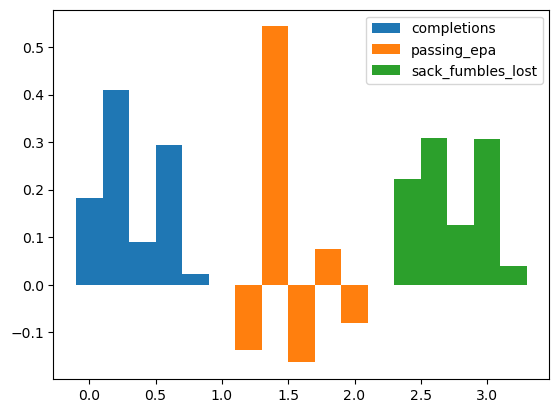

In [130]:
for i in range(3):
    plt.bar(x + i*6*width, qb_clusters_norm2[:,i], width, label=uncorr_cols[i])
plt.legend()

In [134]:
group_names2 = dict()

for i in range(5):
    group_names2[i] = list(qb_data_agg.loc[qb_km2.labels_ == i,'name'].values)

In [141]:
qb_data_agg[qb_data_agg['name'] == 'Andrew Luck']

,name,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr
5,Andrew Luck,333.333333,548.333333,3945.166667,28.5,13.833333,29.0,187.333333,5.333333,2.5,4763.333333,1688.0,193.166667,46.851772,1.5,12.628088


In [138]:
group_names[4]

['Andrew Luck',
 'Baker Mayfield',
 'Ben Roethlisberger',
 'Bo Nix',
 'C.J. Stroud',
 'Caleb Williams',
 'Dak Prescott',
 'Derek Carr',
 'Drew Brees',
 'Eli Manning',
 'Jared Goff',
 'Jayden Daniels',
 'Joe Burrow',
 'Josh Allen',
 'Justin Herbert',
 'Matt Ryan',
 'Matthew Stafford',
 'Patrick Mahomes',
 'Peyton Manning',
 'Philip Rivers',
 'Russell Wilson',
 'Tom Brady',
 'Trevor Lawrence']